IMPORTING NUMPY LIBRARY

In [32]:
import numpy as np

**LINEAR** **REGRESSION**

In [33]:
class Linear_Regression():

  # INITIATING THE PARAMETERS LEARNING RATE AND NO OF ITERATIONS
  # self IS THE REFERENCE TO THE INSTANCE OF CLASS ITSELF

  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # NUMBER OF TRAINING EXAMPLES AND FEATURES
    # ROW NUM INTO m AND COL NUM INTO n
    self.m, self.n = X.shape

    # INITIATING THE WEIGHT AND BIAS

    self.w = np.zeros(self.n) # INITIATING USING NO OF COLS
    self.b = 0
    self.X = X
    self.Y = Y

    # IMPLEMENTING GRADIENT DESCENT

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # CALCULATE GRADIENTS

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m  #TRANSPOSE OF X IS NECESSARY FOR CHANGING IT TO A SINGLE ROW ARRAY
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # UPDATING GRADIENTS

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):

    return X.dot(self.w) + self.b

IMPLEMENTING THE MODEL

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-preocessing

In [35]:
saldf = pd.read_csv('/content/drive/MyDrive/ML Datasets/salary.csv')
saldf.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
saldf.isnull().sum()

,0
YearsExperience,0
Salary,0


In [37]:
saldf.shape

(30, 2)

SPLITTING FEATURES AND TARGET

In [38]:
X = saldf.drop(columns = 'Salary', axis = 1)
Y = saldf.Salary

In [39]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [40]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


TRAIN TEST SPLIT

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 2)

In [42]:
X_train.shape

(20, 1)

TRAINING THE MODEL

In [43]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000) # PASSING LR AND NO ITR

In [44]:
model.fit(X_train, Y_train)

PRINTING PARAMETERS FROM THE MODEL

In [47]:
print(model.w[0])

9514.400999035135


<ipython-input-47-30eeccefc686>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.w[0])


In [46]:
print(model.b)

23697.406507136307


In [49]:
res = model.predict(X_test)

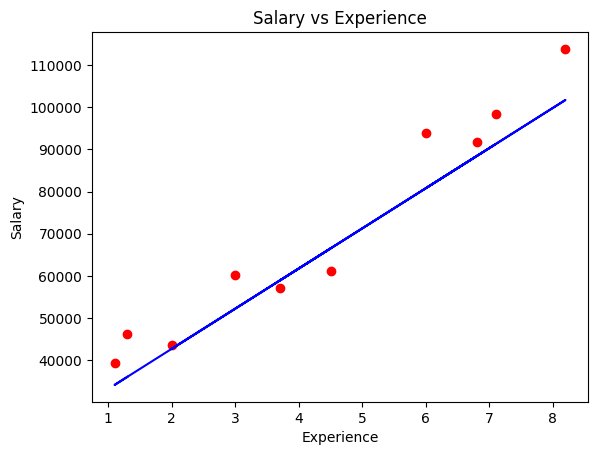

In [53]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, res, color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()